<a href="https://colab.research.google.com/github/mswetha44/Wine-Quality/blob/main/Wquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Loading the Data

In [ ]:
df = pd.read_csv('/content/archive (32).zip')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5



Th dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.It is having 13 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.type.unique()

array(['white', 'red'], dtype=object)

In [ ]:
df.type = df.type.map({"white":1,"red":0})

In [ ]:
import seaborn as sb

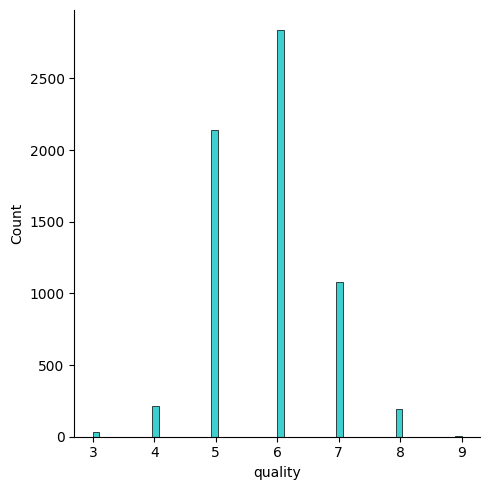

In [ ]:
sb.displot(x = df['quality'], kde = False, color = 'c')

Analysis of quality with other various features

<Axes: xlabel='quality', ylabel='alcohol'>

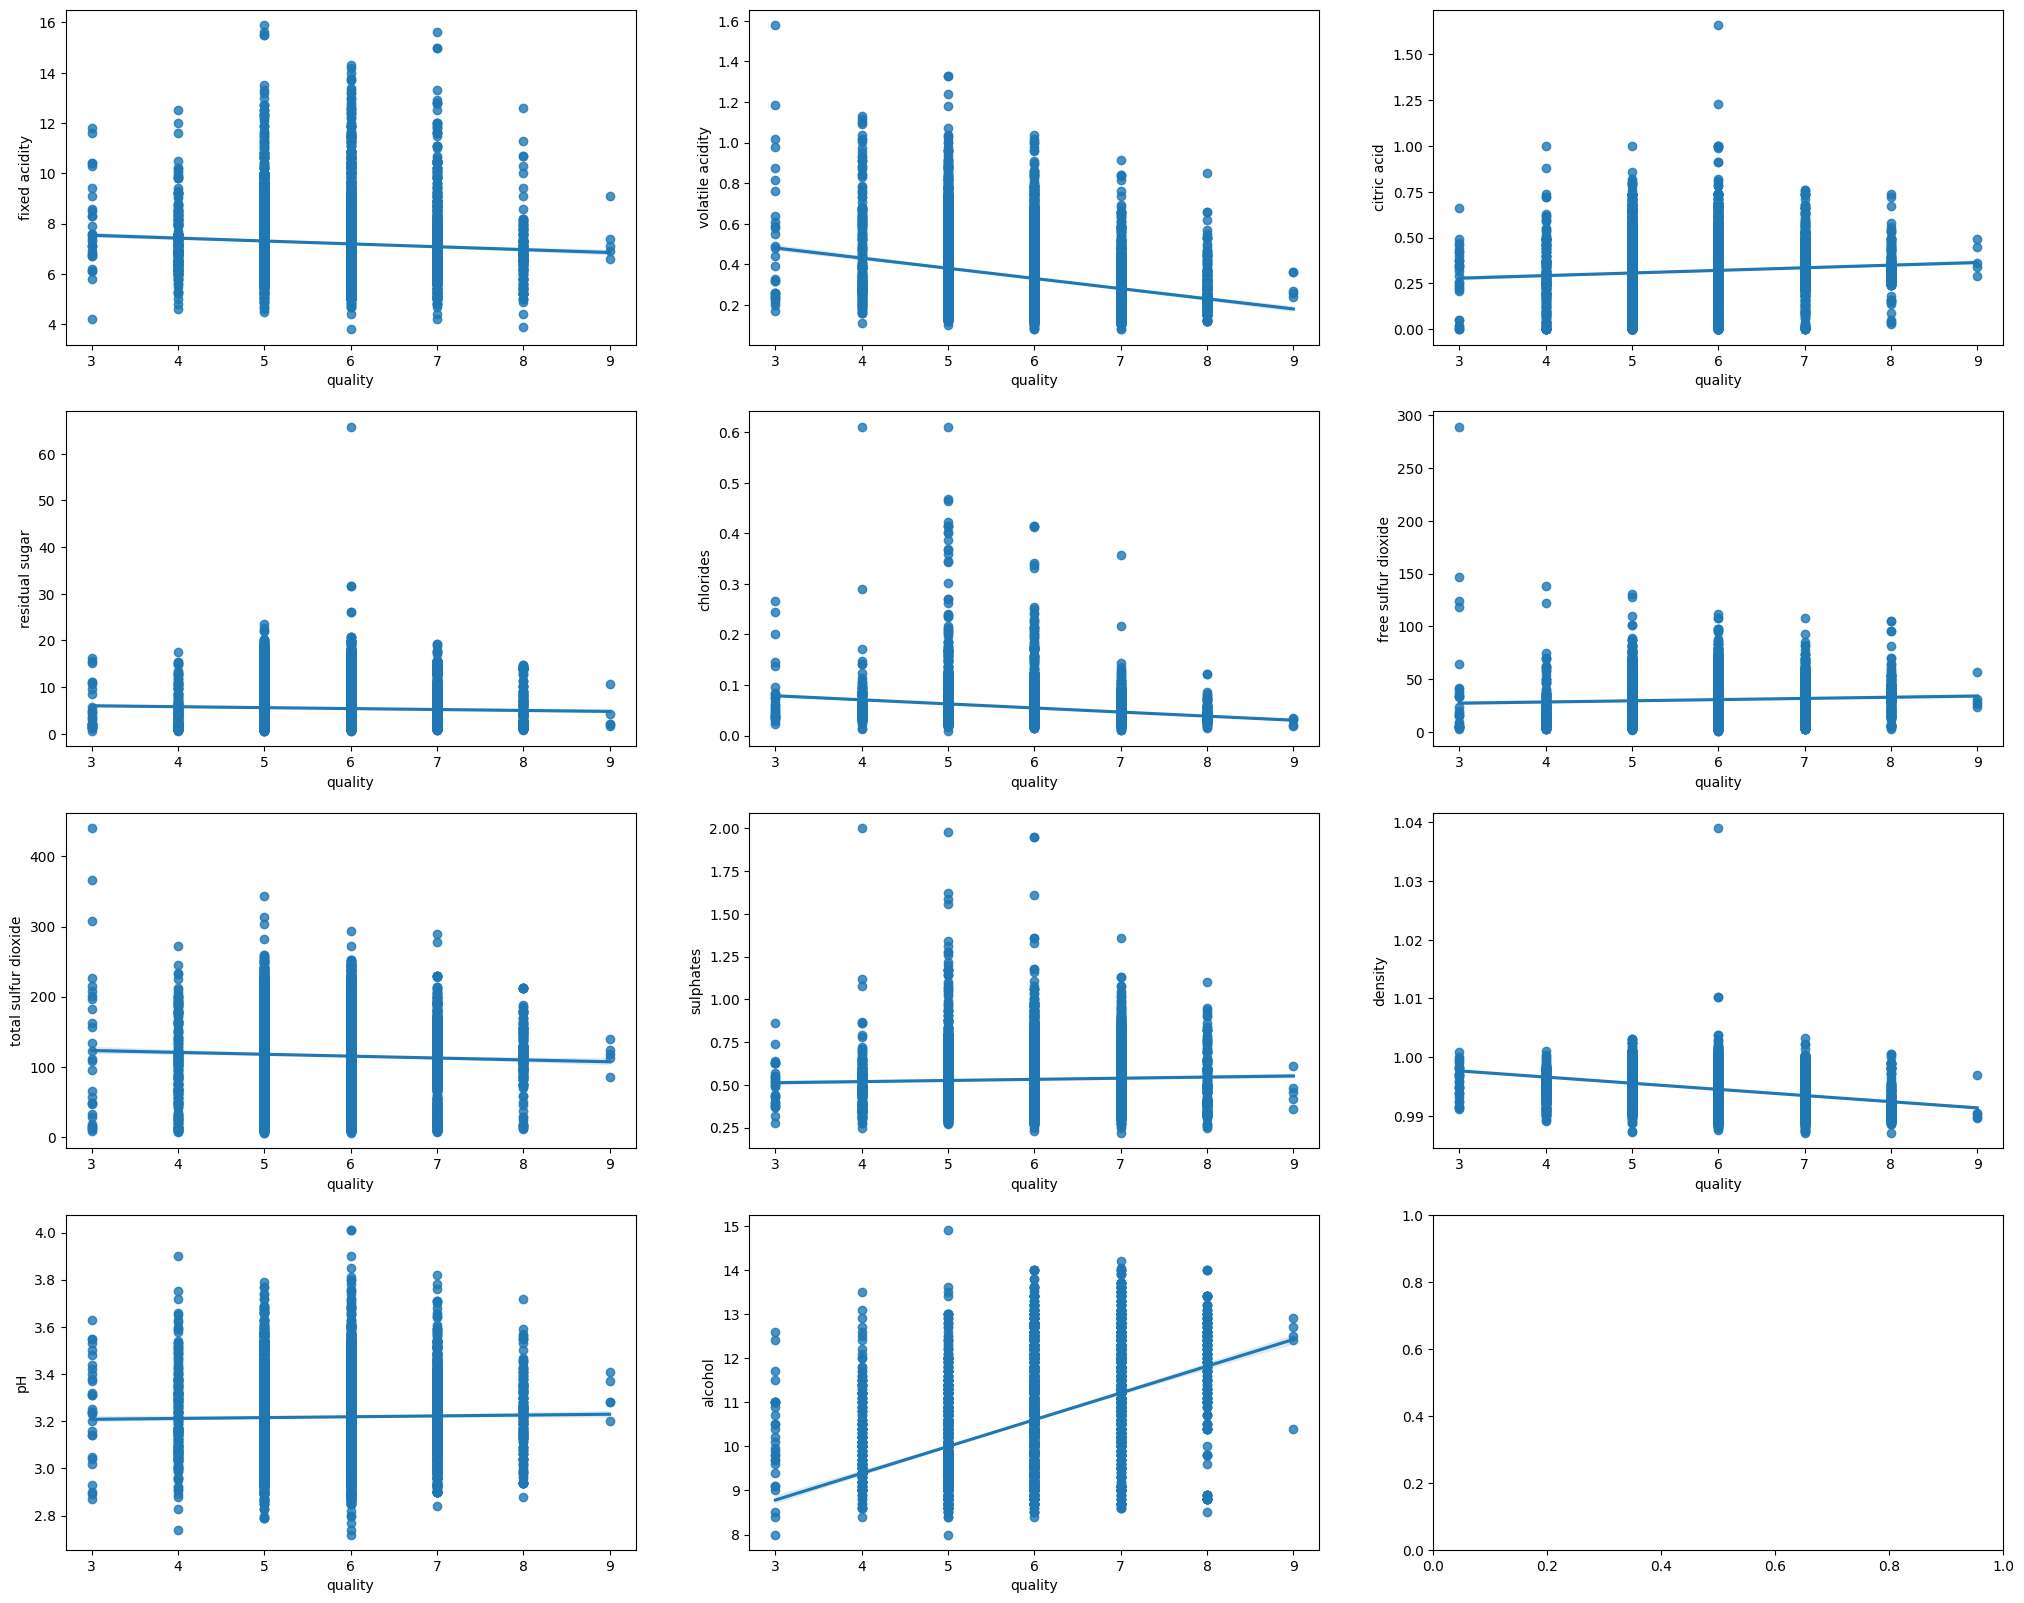

In [ ]:
f, x = plt.subplots(4, 3, figsize = (25, 20))
sb.regplot(x = df['quality'], y = df['fixed acidity'], ax = x[0, 0])
sb.regplot(x = df['quality'], y = df['volatile acidity'], ax = x[0, 1])
sb.regplot(x = df['quality'], y = df['citric acid'], ax = x[0, 2])
sb.regplot(x = df['quality'], y = df['residual sugar'], ax = x[1, 0])
sb.regplot(x = df['quality'], y = df['chlorides'], ax = x[1, 1])
sb.regplot(x = df['quality'], y = df['free sulfur dioxide'], ax = x[1, 2])
sb.regplot(x = df['quality'], y = df['total sulfur dioxide'], ax = x[2, 0])
sb.regplot(x = df['quality'], y = df['sulphates'], ax = x[2, 1])
sb.regplot(x = df['quality'], y = df['density'], ax = x[2, 2])
sb.regplot(x = df['quality'], y = df['pH'], ax = x[3, 0])
sb.regplot(x = df['quality'], y = df['alcohol'], ax = x[3, 1])

Corelation Matrix

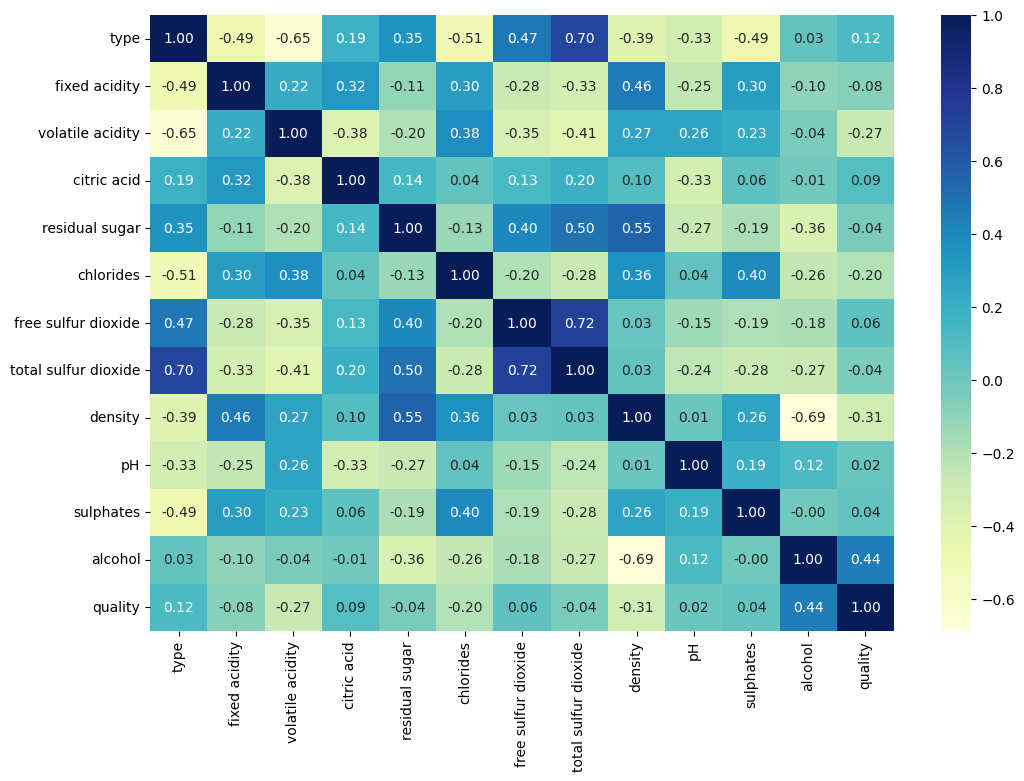

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
   # Show the plot
plt.show()

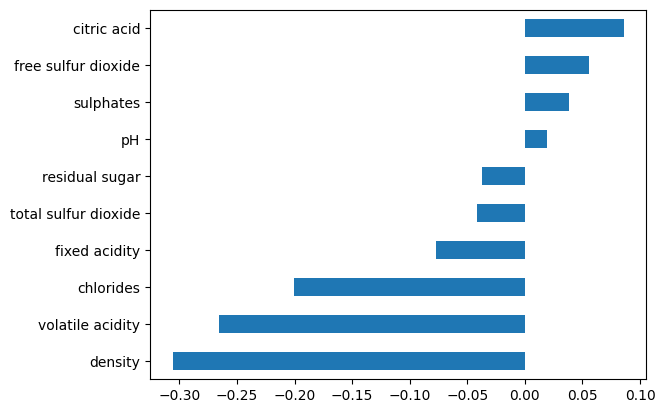

In [ ]:
df.corr()['quality'].sort_values().head(11)[:-1].plot.barh();

In [ ]:
#Defining a class for data preprocessing
class DataPreprocessor:
    def __init__(self, numerical_columns, categorical_columns):
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.scaler = StandardScaler()

        # Scale numerical features
        df = self.scale_numerical_features(df)

        return df

    def scale_numerical_features(self, df):
        # Scale the numerical features
        df[self.numerical_columns] = self.scaler.fit_transform(df[self.numerical_columns])
        return df

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
missing_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']

#Technique 2: Using median to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Splitting the data

In [ ]:
# Setting target and features from preprocessed dataset
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5197, 12)
X_test shape: (1300, 12)
y_train shape: (5197,)
y_test shape: (1300,)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Evaluating metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def eval_metrics(actual, pred):
  rmse = np.sqrt(mean_squared_error(actual, pred))
  mae = mean_absolute_error(actual, pred)
  mse = mean_squared_error(actual, pred)
  score = r2_score(actual, pred)

  return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.3404845408986851 
 mae: 0.5452241365355928 
 mse: 0.4714212599197861 
 rmse: 0.6866012379247405


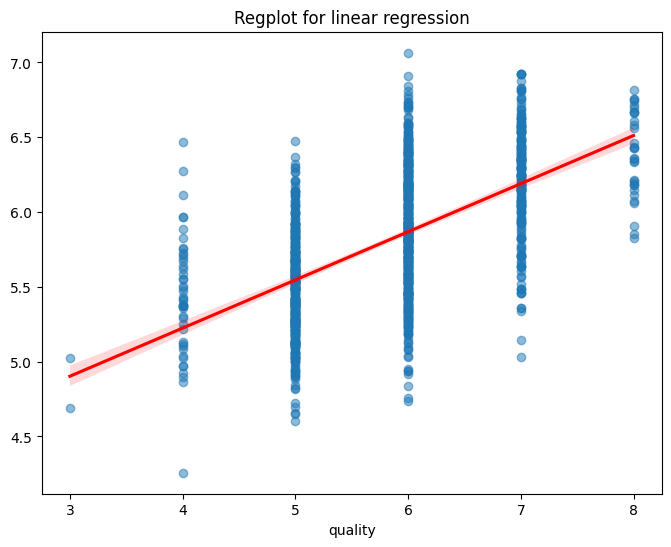

In [ ]:
# Visualize the fit using regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regplot for linear regression')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=8)

tree_reg.fit(X_train, y_train)
# Now that the model is trained, let’s evaluate it on the training set:
y_pred =tree_reg.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.28857823171659014 
 mae: 0.5273800671273957 
 mse: 0.5085238590093552 
 rmse: 0.7131085885118444


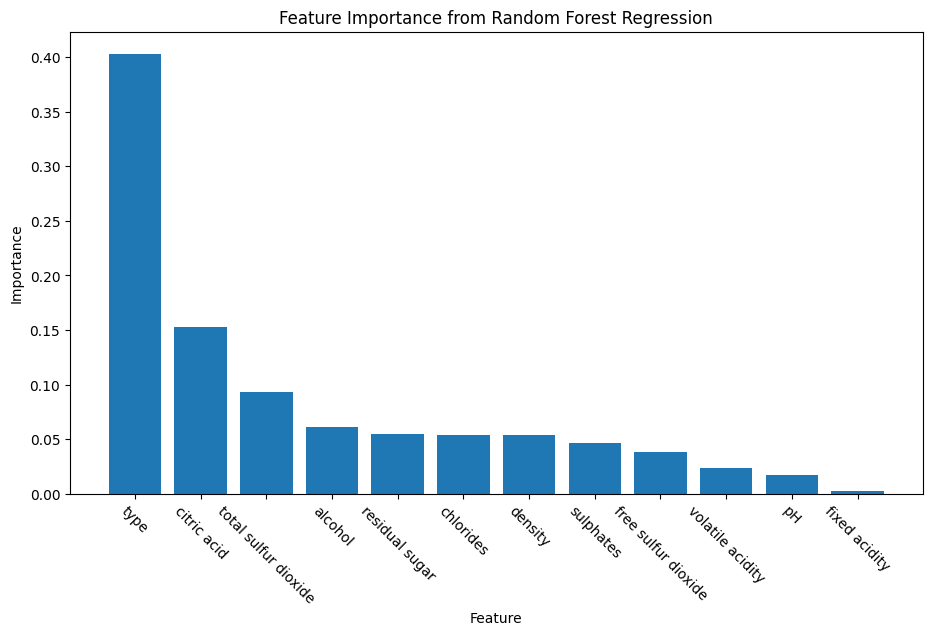

In [ ]:
feature_importances = tree_reg.feature_importances_
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(11, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest Regression")
plt.show()

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=20)

forest.fit(X_train, y_train)
# Now that the model is trained, let’s evaluate it on the training set:
y_pred =tree_reg.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.28857823171659014 
 mae: 0.5273800671273957 
 mse: 0.5085238590093552 
 rmse: 0.7131085885118444


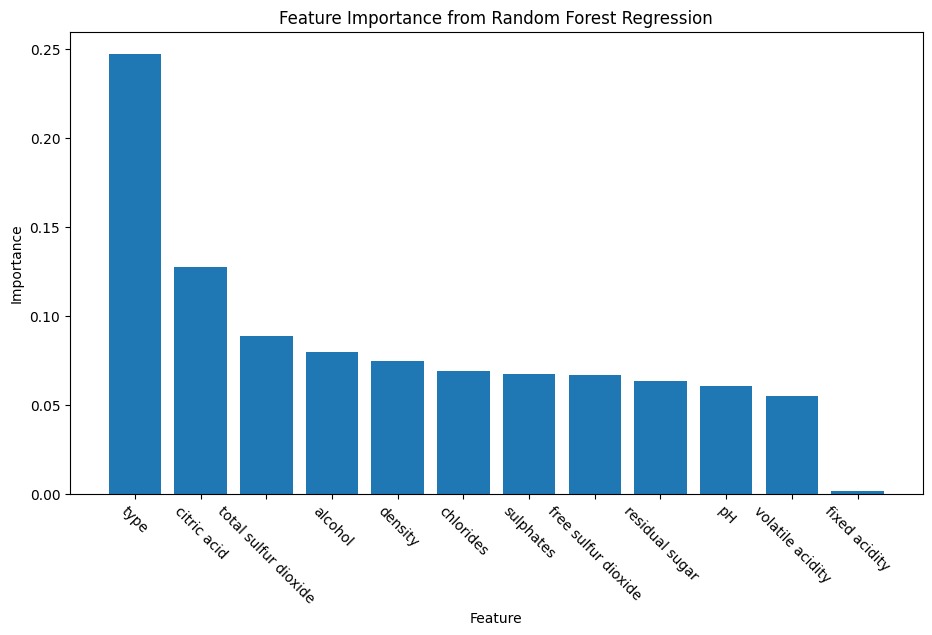

In [ ]:
feature_importances = forest.feature_importances_
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(11, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest Regression")
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

Perfomance with Hyper parameters

In [ ]:
# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = {
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 5, 10]}),
          'RandomForestRegressor' : (RandomForestRegressor(random_state=42), {'n_estimators': [10, 100]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2)}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(random_state=42),{'n_estimators': [10, 100]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100]}),
          'AdaBoostRegressor': (AdaBoostRegressor(random_state=42), {'n_estimators': [10, 100]}),
          }
model_scores = []
# For loop to iterate over the models
for name, (model, params) in models.items():
    # create a pipline
    pipeline = RandomizedSearchCV(model, params, cv=5 , verbose=1 , n_jobs=-1)
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    best_parameter = pipeline.best_params_
    model_scores.append((name,r2 , mae , mse,best_parameter))
# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
# Printing Each model with evaluation metrics
for model in sorted_models:
    print('R_2 for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('MAE for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('MSE for', f"{model[0]} is {model[3]: .2f}")

# Best Parameter for each model
for model in sorted_models:
    print('Best Parameters for', f"{model[0]} is {model[4]}")
print('\n')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
R_2 for KNeighborsRegressor is  0.15
R_2 for SVR is  0.15
R_2 for AdaBoostRegressor is  0.32
R_2 for DecisionTreeRegressor is  0.34
R_2 for LinearRegression is  0.34
R_2 for GradientBoostingRegressor is  0.42
R_2 for XGBRegressor is  0.49
R_2 for RandomForestRegressor is  0.56


MAE for KNeighborsRegressor is  0.63
MAE for SVR is  0.61
MAE for AdaBoostRegressor is  0.56
MAE for DecisionTreeRegressor is  0.54
MAE for LinearRegression is  0.55
MAE for GradientBoostingRegressor is  0.51
MAE for XGBRegressor is  0.44
MAE for RandomForestRegressor is  0.40


MSE for KNeighborsRegressor is  0.61
MSE for SVR is  0.61
MSE for AdaBoostRegressor is  0.49
MSE for DecisionTreeRegressor is  0.47
MSE for LinearRegression is  0.47
MSE for GradientBoostingRegressor is  0.41
MSE for XGBRegressor is  0.36
MSE for RandomForestRegressor is  0.32
Best Parameters for KNeighborsRegressor is {'n_neighbors': 17}
Best Parameters for SVR is {'kernel': '

Changing the target

In [ ]:
# Setting target and features from dataset
X = df.drop(columns=['alcohol'])
y = df['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5197, 12)
X_test shape: (1300, 12)
y_train shape: (5197,)
y_test shape: (1300,)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Defining a class for model evaluation
class ModelEvaluator():
    def __init__(self, model, X_test, y_test, model_name):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.model_name = model_name

    def plot_regression_results(self, y_true, y_pred, testing_type):
        plt.figure(figsize=(8, 8))
        plt.scatter(y_true, y_pred, alpha=0.5, label=f'{self.model_name} Predictions', color='blue')
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', linewidth=2, label='Ideal Predictions')
        plt.title(f'{self.model_name} - Regression Results ({testing_type})')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.show()


    def regression_accuracy(self, y_true, y_pred, tolerance=0.1):
        within_tolerance = (abs(y_true - y_pred) / y_true) <= tolerance
        accuracy = within_tolerance.mean() * 100.0
        return accuracy

    def evaluate_regression(self):
        y_pred = self.model.predict(self.X_test)

        # Custom Accuracy
        accuracy = self.regression_accuracy(self.y_test, y_pred)
        print(f"Regression Accuracy: {accuracy:.2f}%")

        # Mean Squared Error
        mse = mean_squared_error(self.y_test, y_pred)
        print(f"Mean Squared Error: {mse:.4f}")

        # R-squared
        r2 = r2_score(self.y_test, y_pred)
        print(f"R-squared: {r2:.4f}")

        # Mean Absolute Error
        mae = mean_absolute_error(self.y_test, y_pred)
        print(f"Mean Absolute Error: {mae:.4f}")

        # Root Mean Squared Error
        rmse = np.sqrt(mse)
        print(f"Root Mean Squared Error: {rmse:.4f}")

        self.plot_regression_results(self.y_test, y_pred, 'Test Set')

    def evaluate_regression_with_cross_val(self, num_folds=5):
        # Perform cross-validation
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
        y_pred_cv = cross_val_predict(self.model, self.X_test, self.y_test, cv=kf)

        # Custom Accuracy for Cross-Validation
        accuracy_cv = self.regression_accuracy(self.y_test, y_pred_cv)
        print(f"Cross-Validated Regression Accuracy: {accuracy_cv:.2f}%")

        # Mean Squared Error
        mse_cv = mean_squared_error(self.y_test, y_pred_cv)
        print(f"Cross-Validated Mean Squared Error: {mse_cv:.4f}")

        # R-squared
        r2_cv = r2_score(self.y_test, y_pred_cv)
        print(f"Cross-Validated R-squared: {r2_cv:.4f}")

        # Mean Absolute Error
        mae_cv = mean_absolute_error(self.y_test, y_pred_cv)
        print(f"Cross-Validated Mean Absolute Error: {mae_cv:.4f}")

        # Root Mean Squared Error
        rmse_cv = np.sqrt(mse_cv)
        print(f"Cross-Validated Root Mean Squared Error: {rmse_cv:.4f}")

        # Plot Regression Results for one fold
        self.plot_regression_results(self.y_test, y_pred_cv, 'Cross-Validated')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

Linear Regression Model Evaluation:

Regression Accuracy: 98.08%
Mean Squared Error: 0.2086
R-squared: 0.8537
Mean Absolute Error: 0.3432
Root Mean Squared Error: 0.4568


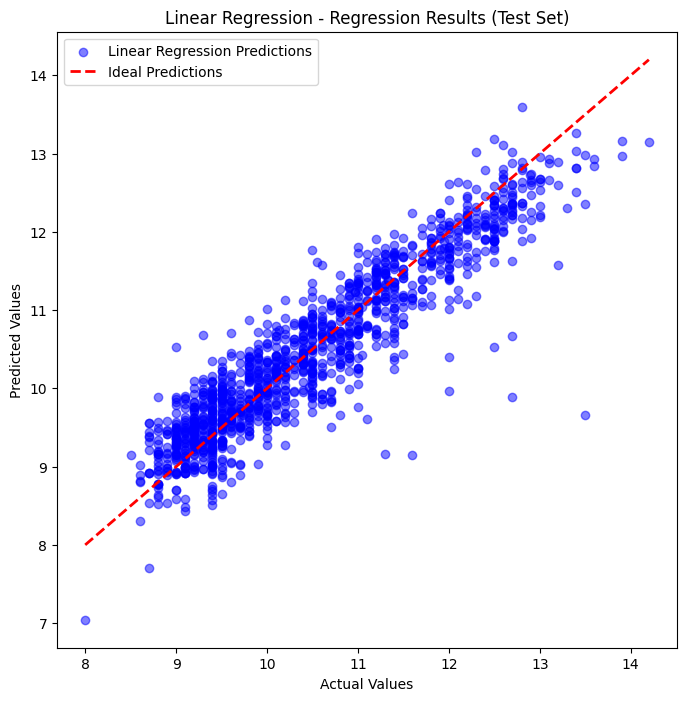

Cross-Validated Regression Accuracy: 97.69%
Cross-Validated Mean Squared Error: 0.2045
Cross-Validated R-squared: 0.8566
Cross-Validated Mean Absolute Error: 0.3312
Cross-Validated Root Mean Squared Error: 0.4523


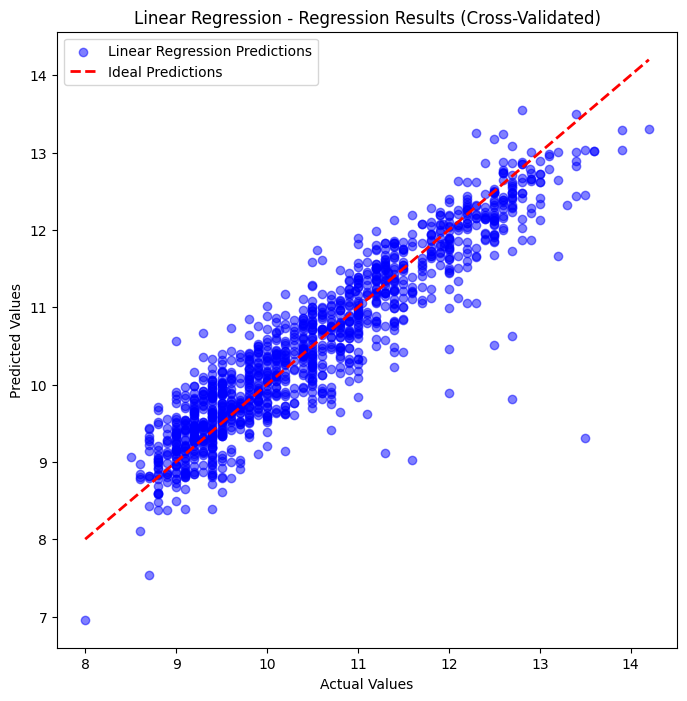

Random Forest Model Evaluation:

Regression Accuracy: 98.62%
Mean Squared Error: 0.1492
R-squared: 0.8953
Mean Absolute Error: 0.2644
Root Mean Squared Error: 0.3863


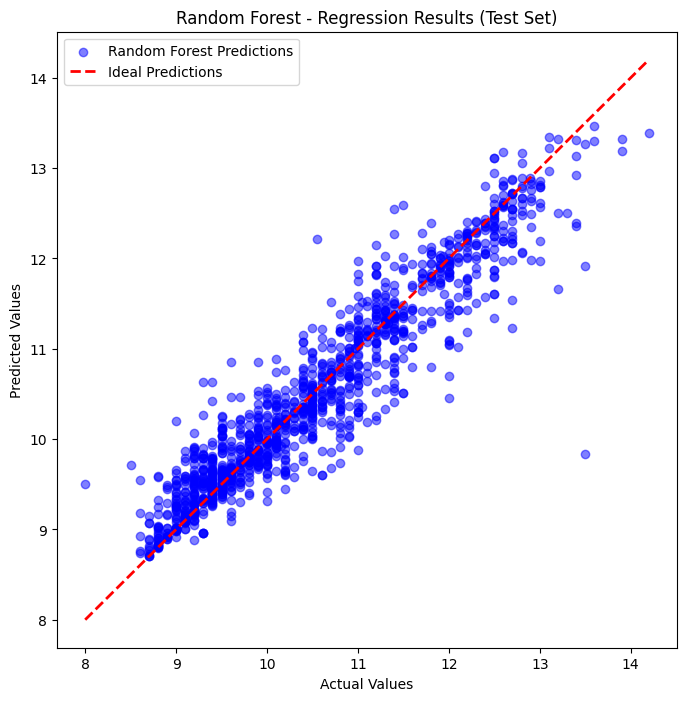


Feature Importance:
                 Feature  Importance
8                density    0.600877
4         residual sugar    0.106922
7   total sulfur dioxide    0.052340
0                   type    0.039798
1          fixed acidity    0.039220
5              chlorides    0.029479
9                     pH    0.029473
3            citric acid    0.024600
10             sulphates    0.023179
11               quality    0.021846
2       volatile acidity    0.020964
6    free sulfur dioxide    0.011301


Cross-Validated Regression Accuracy: 95.92%
Cross-Validated Mean Squared Error: 0.2625
Cross-Validated R-squared: 0.8159
Cross-Validated Mean Absolute Error: 0.3828
Cross-Validated Root Mean Squared Error: 0.5123


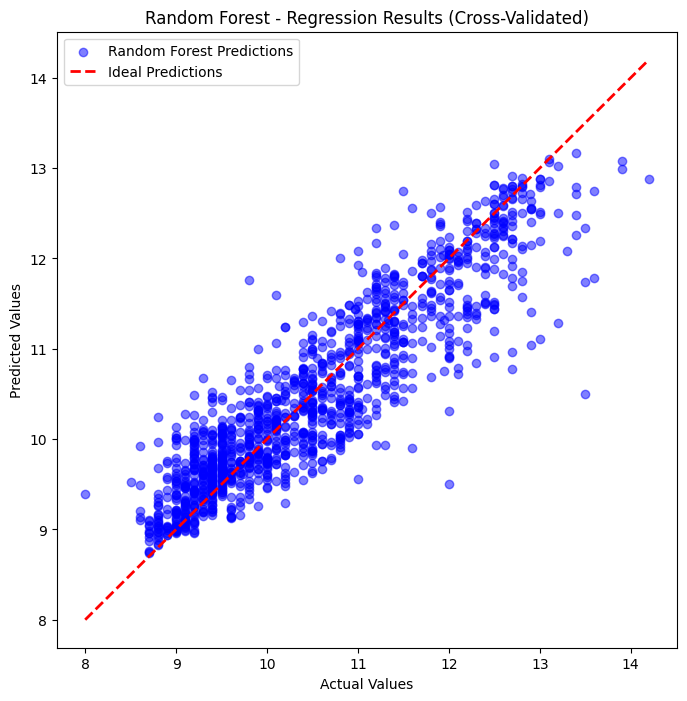

Gradient Boosting Model Evaluation:

Regression Accuracy: 97.54%
Mean Squared Error: 0.2194
R-squared: 0.8461
Mean Absolute Error: 0.3587
Root Mean Squared Error: 0.4684


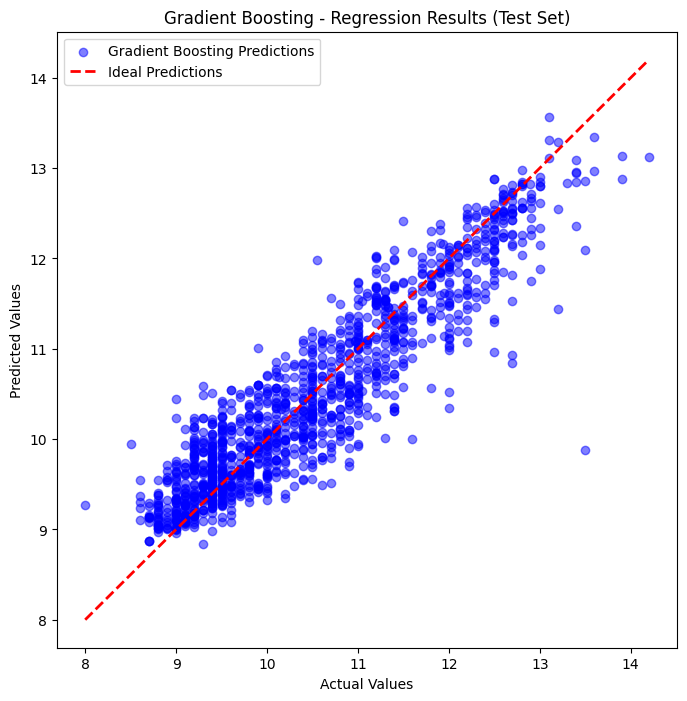


Feature Importance:
                 Feature  Importance
8                density    0.665490
4         residual sugar    0.089326
11               quality    0.050696
7   total sulfur dioxide    0.044925
0                   type    0.038126
1          fixed acidity    0.035148
9                     pH    0.022938
2       volatile acidity    0.016449
5              chlorides    0.014874
10             sulphates    0.013793
3            citric acid    0.007761
6    free sulfur dioxide    0.000475


Cross-Validated Regression Accuracy: 96.54%
Cross-Validated Mean Squared Error: 0.2687
Cross-Validated R-squared: 0.8115
Cross-Validated Mean Absolute Error: 0.3922
Cross-Validated Root Mean Squared Error: 0.5184


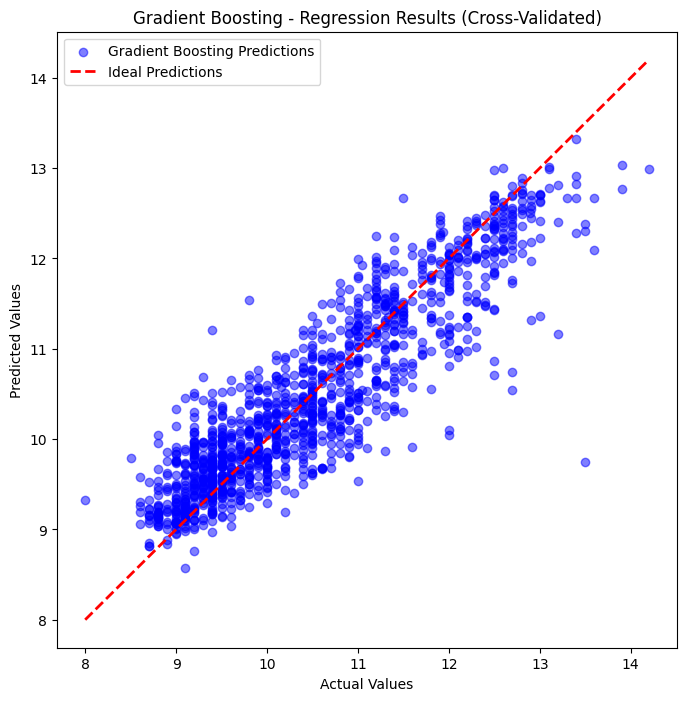

Ridge Regression Model Evaluation:

Regression Accuracy: 75.46%
Mean Squared Error: 0.7666
R-squared: 0.4624
Mean Absolute Error: 0.7041
Root Mean Squared Error: 0.8756


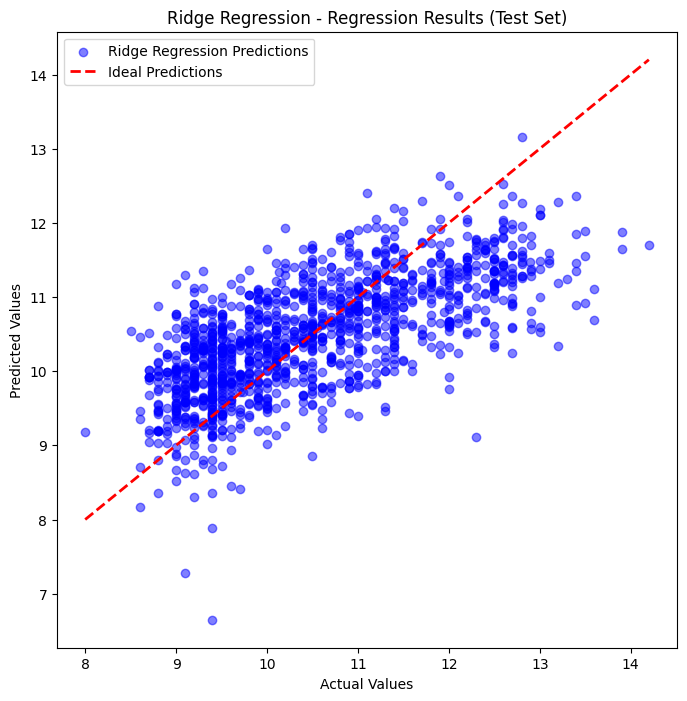

Cross-Validated Regression Accuracy: 75.46%
Cross-Validated Mean Squared Error: 0.7845
Cross-Validated R-squared: 0.4498
Cross-Validated Mean Absolute Error: 0.7101
Cross-Validated Root Mean Squared Error: 0.8857


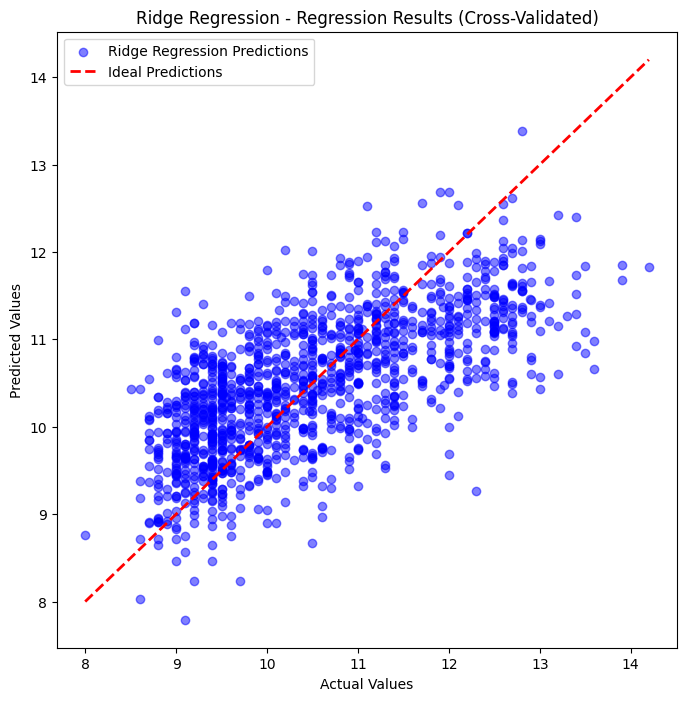

Support Vector Regression Model Evaluation:

Regression Accuracy: 68.38%
Mean Squared Error: 1.0367
R-squared: 0.2730
Mean Absolute Error: 0.8127
Root Mean Squared Error: 1.0182


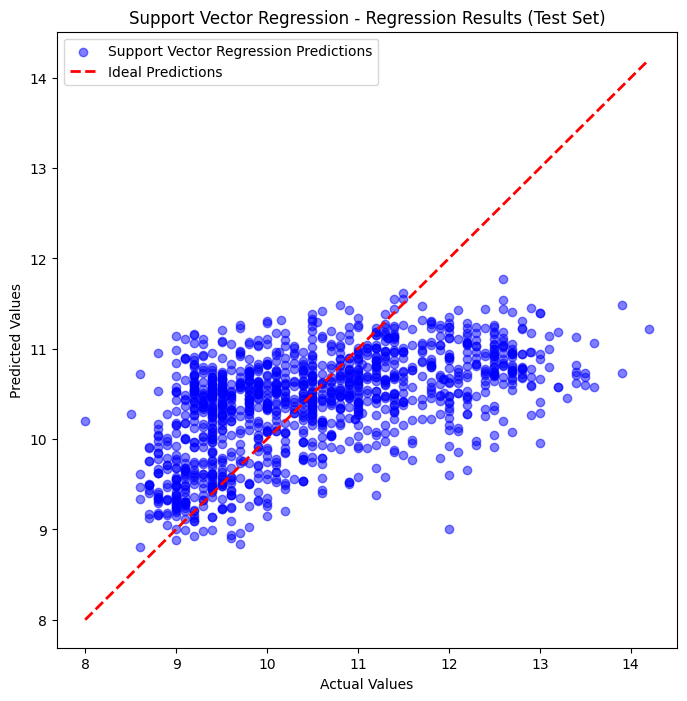

Cross-Validated Regression Accuracy: 65.08%
Cross-Validated Mean Squared Error: 1.1451
Cross-Validated R-squared: 0.1970
Cross-Validated Mean Absolute Error: 0.8568
Cross-Validated Root Mean Squared Error: 1.0701


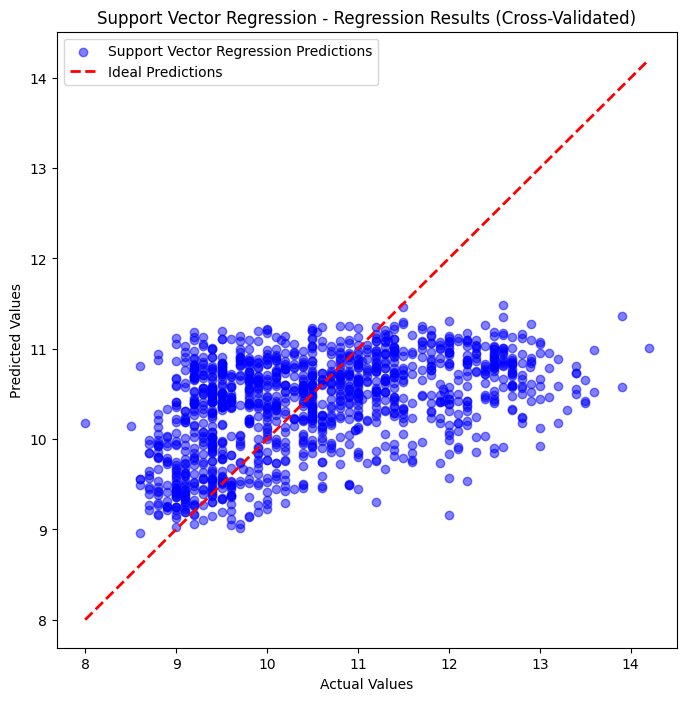

K-Nearest Neighbors Regression Model Evaluation:

Regression Accuracy: 71.15%
Mean Squared Error: 1.0339
R-squared: 0.2749
Mean Absolute Error: 0.7876
Root Mean Squared Error: 1.0168


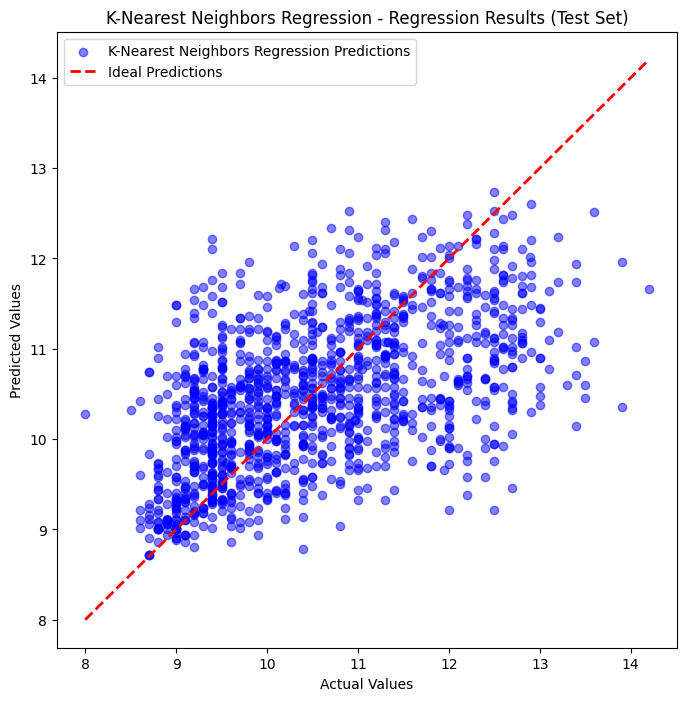

Cross-Validated Regression Accuracy: 65.31%
Cross-Validated Mean Squared Error: 1.2032
Cross-Validated R-squared: 0.1562
Cross-Validated Mean Absolute Error: 0.8825
Cross-Validated Root Mean Squared Error: 1.0969


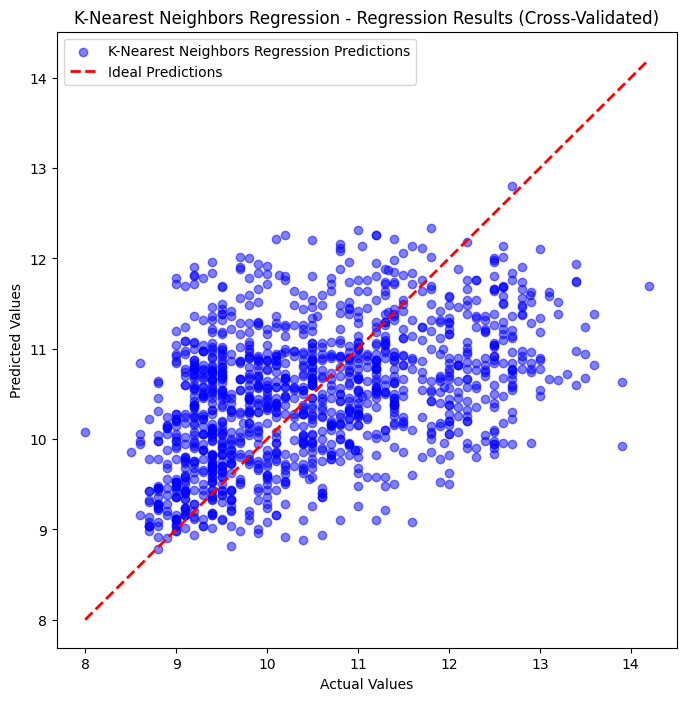

Decision Tree Regression Model Evaluation:

Regression Accuracy: 92.23%
Mean Squared Error: 0.3261
R-squared: 0.7713
Mean Absolute Error: 0.3388
Root Mean Squared Error: 0.5711


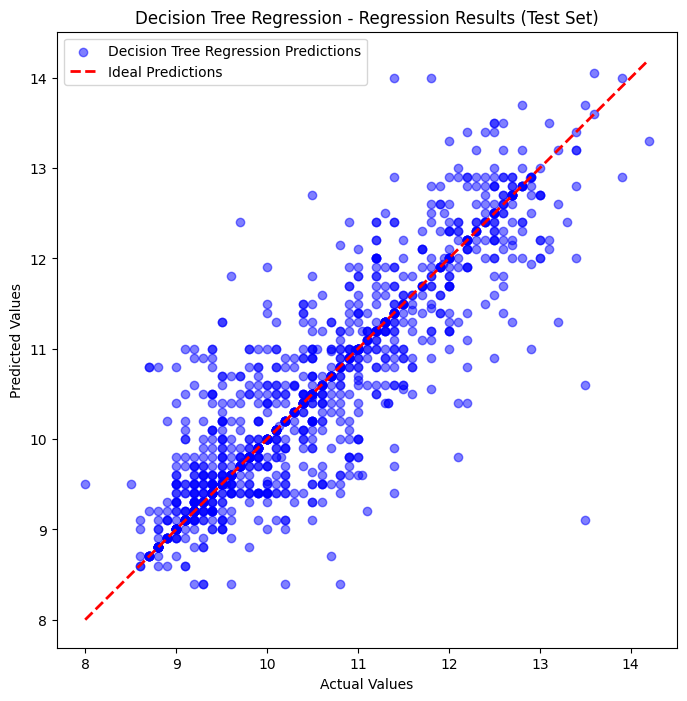


Feature Importance:
                 Feature  Importance
8                density    0.599214
4         residual sugar    0.112103
7   total sulfur dioxide    0.051908
1          fixed acidity    0.040101
0                   type    0.039900
9                     pH    0.027554
2       volatile acidity    0.026516
10             sulphates    0.024032
3            citric acid    0.023180
11               quality    0.023114
5              chlorides    0.021923
6    free sulfur dioxide    0.010455


Cross-Validated Regression Accuracy: 85.85%
Cross-Validated Mean Squared Error: 0.5271
Cross-Validated R-squared: 0.6304
Cross-Validated Mean Absolute Error: 0.5233
Cross-Validated Root Mean Squared Error: 0.7260


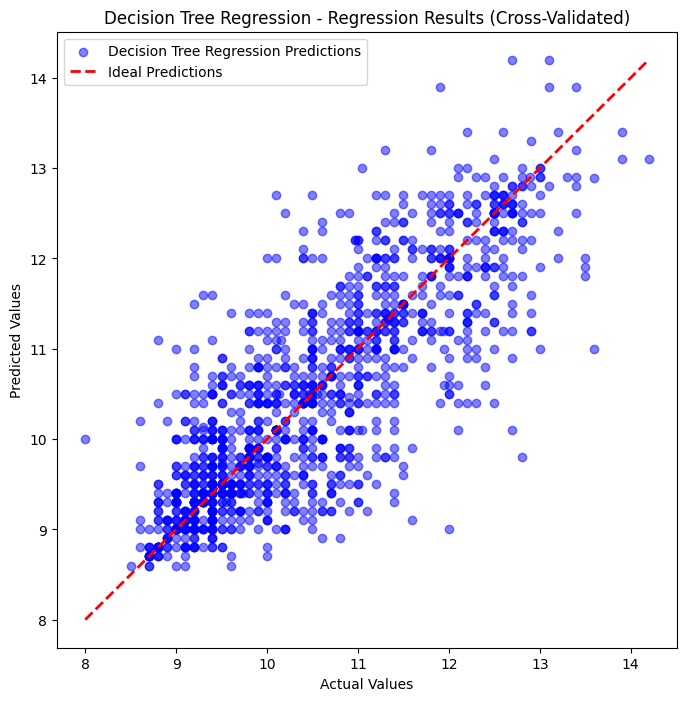

AdaBoost Regression Model Evaluation:

Regression Accuracy: 86.15%
Mean Squared Error: 0.4558
R-squared: 0.6804
Mean Absolute Error: 0.5629
Root Mean Squared Error: 0.6751


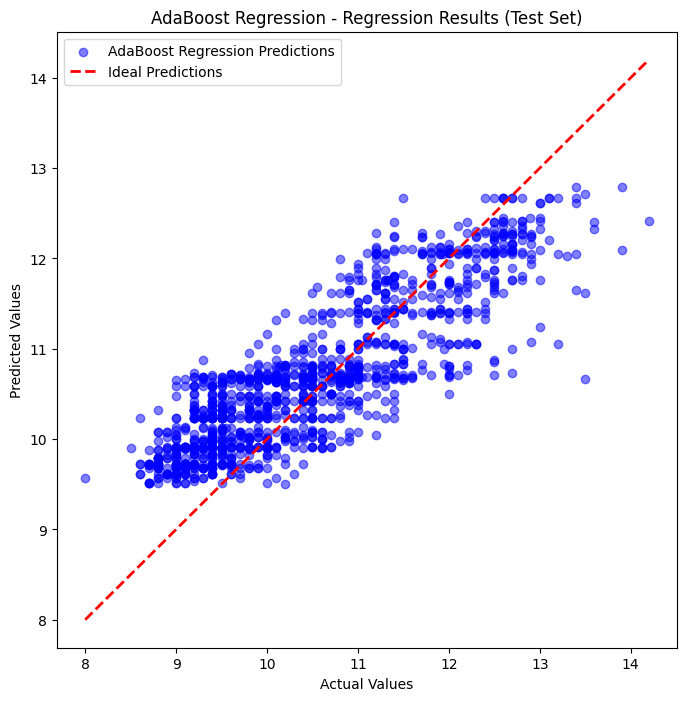


Feature Importance:
                 Feature  Importance
8                density    0.382474
1          fixed acidity    0.141819
4         residual sugar    0.136482
7   total sulfur dioxide    0.087987
11               quality    0.056513
10             sulphates    0.054807
0                   type    0.032739
2       volatile acidity    0.032496
9                     pH    0.029708
3            citric acid    0.019761
6    free sulfur dioxide    0.015657
5              chlorides    0.009557


Cross-Validated Regression Accuracy: 89.62%
Cross-Validated Mean Squared Error: 0.4375
Cross-Validated R-squared: 0.6932
Cross-Validated Mean Absolute Error: 0.5381
Cross-Validated Root Mean Squared Error: 0.6615


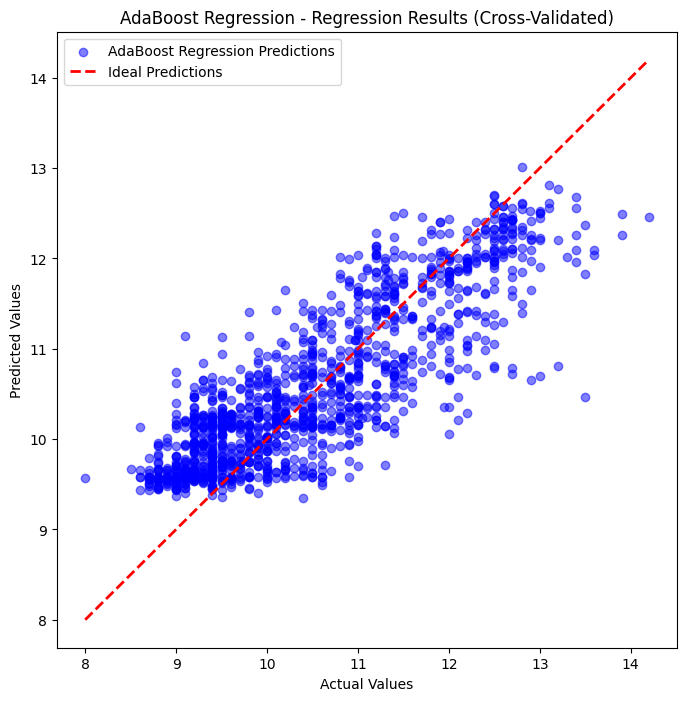

Bagging Regression Model Evaluation:

Regression Accuracy: 97.85%
Mean Squared Error: 0.1692
R-squared: 0.8814
Mean Absolute Error: 0.2856
Root Mean Squared Error: 0.4113


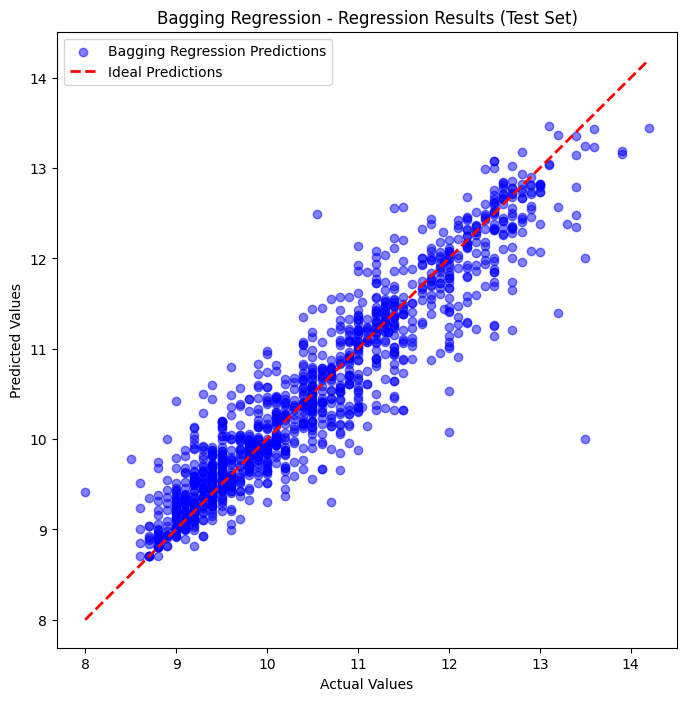

Cross-Validated Regression Accuracy: 94.15%
Cross-Validated Mean Squared Error: 0.2978
Cross-Validated R-squared: 0.7912
Cross-Validated Mean Absolute Error: 0.4048
Cross-Validated Root Mean Squared Error: 0.5457


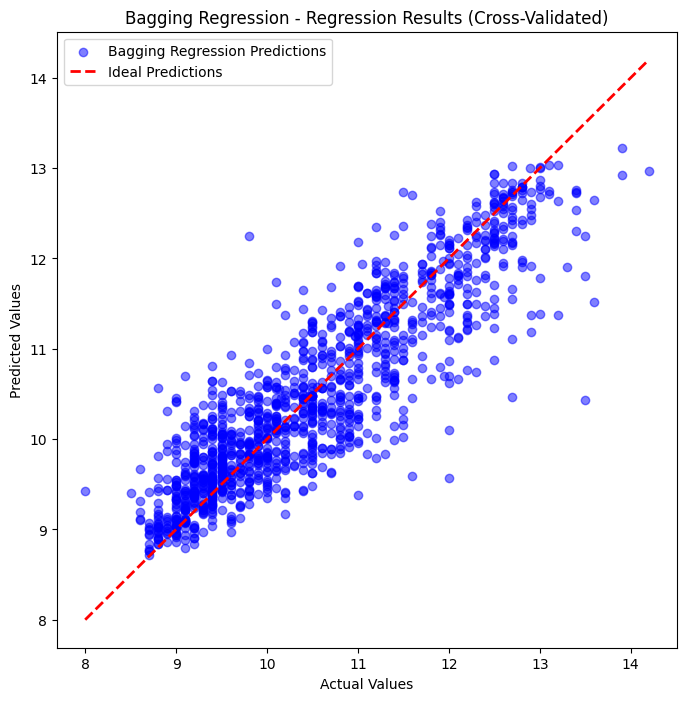

In [ ]:
# Create regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
}

# Train and evaluate each regressor
for name, model in regressors.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = make_pipeline(model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Print model name for identification
    print(f"{name} Model Evaluation:\n")

    # Instantiate the ModelEvaluator for regression
    model_evaluator = ModelEvaluator(pipeline, X_test, y_test, name)

    # Evaluate the model
    model_evaluator.evaluate_regression()

    # Print feature importance if applicable
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("\nFeature Importance:")
        print(feature_importance)
        print("\n")
    # Evaluate the model with cross-validation
    model_evaluator.evaluate_regression_with_cross_val()
